# Investigating the Impact of Austin's Rapid Growth on Travis County and Surrounding Counties

## Data Collection
We used the American Community Survey 1-Year Data API to collect information for the four most populous counties around the Austin Metro Area, which are Travis, Hays, Williamson, and Bastrop, during 2017, 2019, and 2021.  Our data has the same limitations as it’s source which can be referenced at census.gov. The topics we collected data for are:
    - Population Totals
    - Median Income
    - Unemployment Count
    - Population Totals by Race

We did encounter some unexpected challenges. The census did not report for 2020 due to the pandemic. To keep our time frames consistent, we chose to compare odd years only.  Also, to stay consistent with limitations from other data sources we limited our time frame from 2017 to 2021. We acknowledge that this is a very limited view of Austin's growth but since we are focusing on recent growth, we consider this to be an appropriate limitation.

## Cleaning Data
We stored the data we retrieved into three data frames, one for each year containing the information for all four counties. Then we combined the data into one large data frame. We then created data frames containing the relevant data for each topic.


## Visualizations
We chose to create line graphs with markers for the Population, Median Income, and Unemployment data for each county. We found it to be the best to show the changes we were looking for. We tried this for the original data, rate of change, and percentage change but only included the original data form because we felt it was the best representation of change.
For race distribution we chose to create a bar chart broken down by race for all three years for each county. This the clearest way to show the differences of each section of the population together.

## Statistical Analysis
With the limitations of our data set it did not make sense to look for outliers, so we chose not to include standard deviation or quantiles. Since we were looking for change, we felt that a Goodness of Fit test was appropriate. We performed this on the Population, Median Income, and Unemployment areas of interest and found that they all had f static values greater than the critical value and p-values less than 0.05 so we had to reject the null hypothesis of no change.  Therefore, we can state that there was change in these areas.  

## Conclusions
All counties for each topic exhibited change during from 2017 to 2021.
All counties’ populations increased greatly between 2017 and 1019. They continued to grow between 2019 and 2021 but at a slower rate with Travis County growing at a noticeably slower rate than the other counties during this period. This indicates that the surrounding counties are starting to grow at a faster rate than Travis.

Median Income increased for the entire time, whereas Hays and Bastrop exhibited a decrease from 2017 to 2019 and a sharp increase from 2019 to 2021. This could indicate that wage growth is occurring for all the counties and is increasing quickly for Hays and Bastrop which are currently less populous.

Unemployment behaved completely differently for each county. Other than they are all changing there are no predictions we can make based on this data.

Looking at the Population by Race it was surprising to see how much of the population was white across all counties, although there appears to be some growth in diversity occurring with increases in most categories except White and Black/African American. This would indicate that although these counties currently have a very homogenous population, they are changing and if the trend continues they will become more diverse. 






In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import scipy.stats as stats

In [2]:
# Get census Data using census API 

def json_to_dataframe(response):
    return pd.DataFrame(response.json()[1:],columns=response.json()[0])
url_2017 = "https://api.census.gov/data/2017/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B01001I_001E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"
url_2019 = "https://api.census.gov/data/2019/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B01001I_001E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"
url_2021 = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B01001I_001E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"

response=requests.request("GET",url_2017)
response1=requests.request("GET",url_2019)
response2=requests.request("GET",url_2021)


In [3]:
# Save to a dataframe
census_2017_df = pd.DataFrame(json_to_dataframe(response))
census_2019_df = pd.DataFrame(json_to_dataframe(response1))
census_2021_df = pd.DataFrame(json_to_dataframe(response2))

# drop redundant columns
census_2017_df = census_2017_df.drop(['state', 'county'], axis=1)
census_2019_df = census_2019_df.drop(['state', 'county'], axis=1)
census_2021_df = census_2021_df.drop(['state', 'county'], axis=1)
   

In [4]:
# Rename columns
census_2017_df = census_2017_df.rename(
    columns={
      "B01003_001E": "Population 2017",
      "B06011_001E": "Median Income 2017",
      "B23025_005E": "Unemployed for ages>=16 2017",
      "B02001_002E": "Race: White 2017",
      "B02001_003E": "Race: Black or African American 2017",
      "B01001I_001E": "Race: Hispanic/Latino 2017",
      "B02001_004E": "Race: Native American 2017",
      "B02001_005E": "Race: Asian 2017",
      "B02001_006E": "Race: Pacific Islander 2017",
      "B02001_007E": "Race: Other 2017",
      "B02001_008E": "Race: Two or more races 2017",
      "NAME": "Name"      
    }
   )
census_2019_df = census_2019_df.rename(
    columns={
      "B01003_001E": "Population 2019",
      "B06011_001E": "Median Income 2019",
      "B23025_005E": "Unemployed for ages>=16 2019",
      "B02001_002E": "Race: White 2019",
      "B02001_003E": "Race: Black or African American 2019",
      "B01001I_001E": "Race: Hispanic/Latino 2019",
      "B02001_004E": "Race: Native American 2019",
      "B02001_005E": "Race: Asian 2019",
      "B02001_006E": "Race: Pacific Islander 2019",
      "B02001_007E": "Race: Other 2019",
      "B02001_008E": "Race: Two or more races 2019",
      "NAME": "Name"      
    }
   )
census_2021_df = census_2021_df.rename(
    columns={
      "B01003_001E": "Population 2021",
      "B06011_001E": "Median Income 2021",
      "B23025_005E": "Unemployed for ages>=16 2021",
      "B02001_002E": "Race: White 2021",
      "B02001_003E": "Race: Black or African American 2021",
      "B01001I_001E": "Race: Hispanic/Latino 2021",
      "B02001_004E": "Race: Native American 2021",
      "B02001_005E": "Race: Asian 2021",
      "B02001_006E": "Race: Pacific Islander 2021",
      "B02001_007E": "Race: Other 2021",
      "B02001_008E": "Race: Two or more races 2021",
      "NAME": "Name"      
    }
   )

#Adjust population total since it does not inclue Hispanic/Latino
census_2017_df['Total Population 2017'] = census_2017_df['Population 2017'].astype(float) + census_2017_df['Race: Hispanic/Latino 2017'].astype(float)
census_2019_df['Population 2019'] = census_2019_df['Population 2019'].astype(float) + census_2019_df['Race: Hispanic/Latino 2019'].astype(float)
census_2021_df['Population 2021'] = census_2021_df['Population 2021'].astype(float) + census_2021_df['Race: Hispanic/Latino 2021'].astype(float)


census_2021_df.head()

,Name,Population 2021,Median Income 2021,Unemployed for ages>=16 2021,Race: White 2021,Race: Black or African American 2021,Race: Hispanic/Latino 2021,Race: Native American 2021,Race: Asian 2021,Race: Pacific Islander 2021,Race: Other 2021,Race: Two or more races 2021
0,"Travis County, Texas",1740591.0,46868,38913,717362,102957,435437,15976,100325,367,119005,249162
1,"Williamson County, Texas",806125.0,46379,17071,387893,42188,163099,3828,54119,399,47729,106870
2,"Bastrop County, Texas",145257.0,37132,3045,58879,4262,43199,1576,3140,0,13441,20760
3,"Hays County, Texas",359192.0,33453,5774,149132,8401,103795,2074,5029,1258,12138,77365


In [5]:
# Merge DataFrames
census_combined_df = pd.merge(census_2017_df, census_2019_df, how="inner", on=['Name'])
census_combined_df = pd.merge(census_combined_df, census_2021_df, how="inner", on=['Name'])
census_combined_df.set_index('Name', inplace=True)
census_combined_df.head()


,Population 2017,Median Income 2017,Unemployed for ages>=16 2017,Race: White 2017,Race: Black or African American 2017,Race: Hispanic/Latino 2017,Race: Native American 2017,Race: Asian 2017,Race: Pacific Islander 2017,Race: Other 2017,...,Median Income 2021,Unemployed for ages>=16 2021,Race: White 2021,Race: Black or African American 2021,Race: Hispanic/Latino 2021,Race: Native American 2021,Race: Asian 2021,Race: Pacific Islander 2021,Race: Other 2021,Race: Two or more races 2021
Name,,,,,,,,,,,,,,,,,,,,,
"Travis County, Texas",1226698,38480,24416,866322,101281,416156,7940,82866,244,124347,...,46868,38913,717362,102957,435437,15976,100325,367,119005,249162
"Hays County, Texas",214485,31877,5797,187859,9325,83712,1137,3218,123,6495,...,33453,5774,149132,8401,103795,2074,5029,1258,12138,77365
"Williamson County, Texas",547545,37495,10561,435271,32555,134251,1333,35988,204,16467,...,46379,17071,387893,42188,163099,3828,54119,399,47729,106870
"Bastrop County, Texas",84761,30819,1030,60565,7170,32074,295,648,0,14870,...,37132,3045,58879,4262,43199,1576,3140,0,13441,20760


In [6]:
# Create Population Dataframe 
population_df  = census_combined_df[['Population 2017','Population 2019','Population 2021']].copy()
population_df.head()

,Population 2017,Population 2019,Population 2021
Name,,,
"Travis County, Texas",1226698,1702525.0,1740591.0
"Hays County, Texas",214485,322465.0,359192.0
"Williamson County, Texas",547545,737153.0,806125.0
"Bastrop County, Texas",84761,123912.0,145257.0


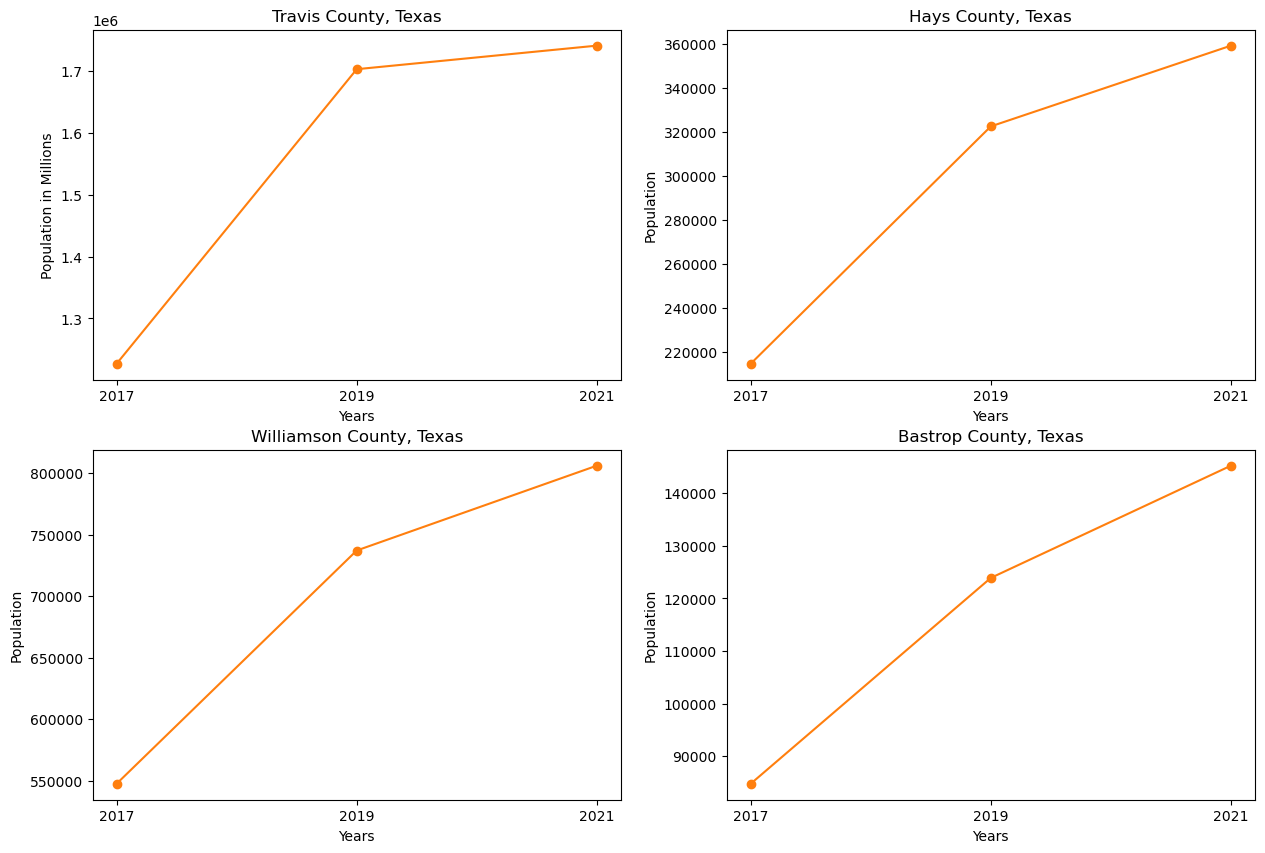

In [18]:
# Create 1 figure containing a linegraphs for each county vs years
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Set the x values equal to the years
x = ['2017', '2019', '2021']

# Set the y values equal to the populations for each county 
y1 = population_df.loc['Travis County, Texas'].astype(int).tolist()
y2 = population_df.loc['Hays County, Texas'].astype(int).tolist()
y3 = population_df.loc['Williamson County, Texas'].astype(int).tolist()
y4 = population_df.loc['Bastrop County, Texas'].astype(int).tolist()

# Plot a graph for each county
axs[0,0].plot(x, y1, color ='tab:orange',marker = 'o')
axs[0,1].plot(x, y2, color ='tab:orange',marker = 'o')
axs[1,0].plot(x, y3,  color ='tab:orange',marker = 'o')
axs[1,1].plot(x, y4,  color ='tab:orange',marker = 'o')

# Set the labels and titles for each graph
axs[0,0].set_title('Travis County, Texas')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Population in Millions')


axs[0,1].set_title('Hays County, Texas')
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('Population')


axs[1,0].set_title('Williamson County, Texas')
axs[1,0].set_xlabel('Years')
axs[1,0].set_ylabel('Population')


axs[1,1].set_title('Bastrop County, Texas')
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('Population')

plt.savefig("output_data/Fig1_population.png")
plt.show() 

In [8]:
# County Population chi square test with stats.chisquare()
counties = ['Travis','Hays','Williamson','Bastrop']

# With four rows, the degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
crictical = critical_value
print(f"The critical value is:  {crictical}")


# Run the chi square test with stats.chisquare() for all 4 counties
dif_Travis_df = pd.DataFrame(population_df.loc['Travis County, Texas'].astype(float))
expected_Travis= dif_Travis_df['Travis County, Texas'].mean()
dif_Travis_df = dif_Travis_df.assign(Expected=expected_Travis).astype(float)
Travis_st, Travis_p = stats.chisquare(dif_Travis_df['Travis County, Texas'], dif_Travis_df['Expected'])

dif_Hays_df = pd.DataFrame(population_df.loc['Hays County, Texas'].astype(float))
expected_Hays= dif_Hays_df['Hays County, Texas'].mean()
dif_Hays_df = dif_Hays_df.assign(Expected=expected_Hays).astype(float)
Hays_st, Hays_p = stats.chisquare(dif_Hays_df['Hays County, Texas'], dif_Hays_df['Expected'])

dif_Williamson_df = pd.DataFrame(population_df.loc['Williamson County, Texas'].astype(float))
expected_Williamson= dif_Williamson_df['Williamson County, Texas'].mean()
dif_Williamson_df = dif_Williamson_df.assign(Expected=expected_Williamson).astype(float)
Williamson_st, Williamson_p = stats.chisquare(dif_Williamson_df['Williamson County, Texas'], dif_Williamson_df['Expected'])

dif_Bastrop_df = pd.DataFrame(population_df.loc['Bastrop County, Texas'].astype(float))
expected_Bastrop= dif_Bastrop_df['Bastrop County, Texas'].mean()
dif_Bastrop_df = dif_Bastrop_df.assign(Expected=expected_Bastrop).astype(float)
Bastrop_st, Bastrop_p = stats.chisquare(dif_Bastrop_df['Bastrop County, Texas'], dif_Bastrop_df['Expected'])


#Create a dataframe to display our results
Statistics_Results = [[Travis_st,Travis_p],
                      [ Hays_st, Hays_p],
                      [Williamson_st, Williamson_p],
                      [Bastrop_st, Bastrop_p]]

Statistiscs_Results_df = pd.DataFrame(Statistics_Results, columns = ['Population f statistic','Population p-value'],  index = counties )
Statistiscs_Results_df         


The critical value is:  5.991464547107979


,Population f statistic,Population p-value
Travis,105346.030856,0.0
Hays,37883.135461,0.0
Williamson,51449.571221,0.0
Bastrop,15958.454615,0.0


# Population Statistical Analysis
The f statistic value is high and the p-values are less than 0.05 so we have to reject the null hypothisis.

In [9]:
# Create Median Income Dataframe 
median_income_df  = census_combined_df[['Median Income 2017','Median Income 2019','Median Income 2021']].copy()
median_income_df.head()

,Median Income 2017,Median Income 2019,Median Income 2021
Name,,,
"Travis County, Texas",38480,41868,46868
"Hays County, Texas",31877,31769,33453
"Williamson County, Texas",37495,40406,46379
"Bastrop County, Texas",30819,24706,37132


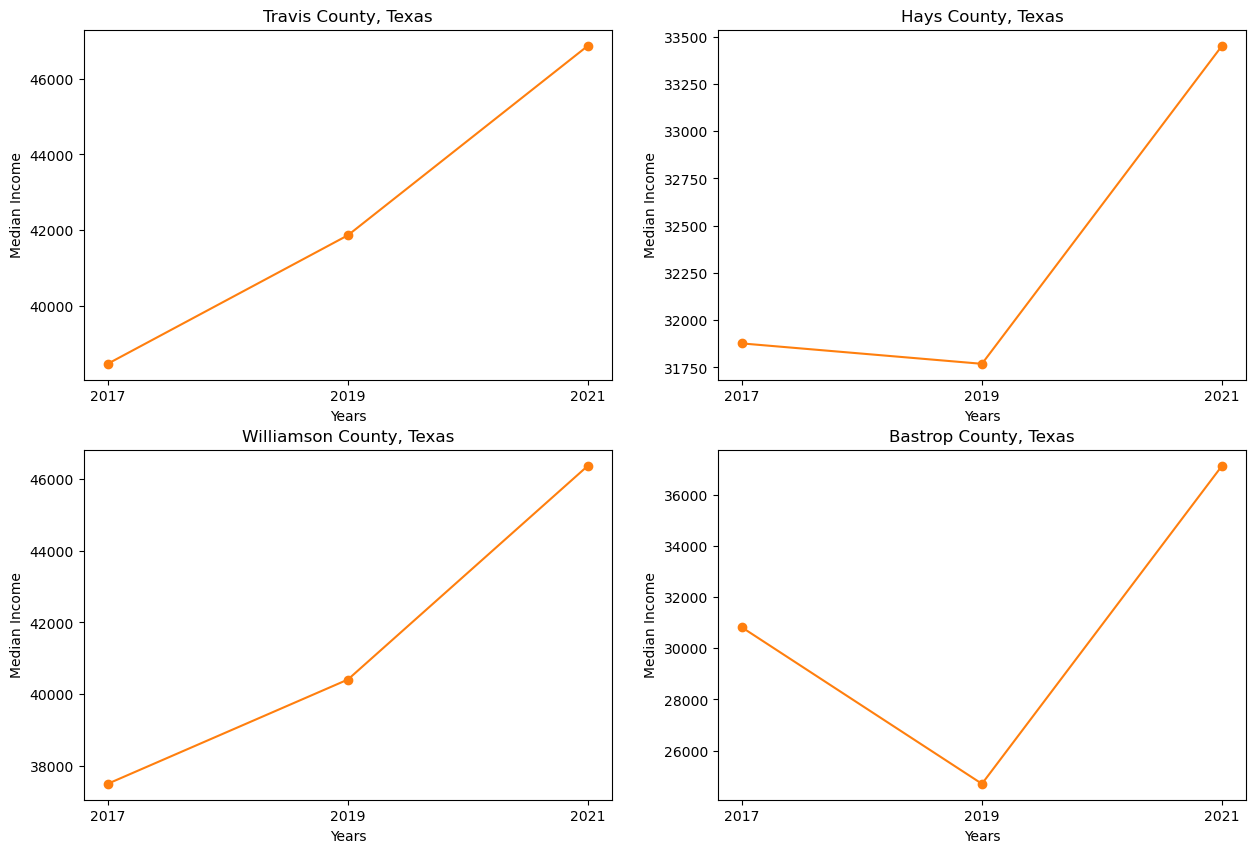

In [10]:
# Create 1 figure containing a linegraphs for each county vs years
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Set the x values equal to the years
x = ['2017', '2019', '2021']

# Set the y values equal to the Median Income for each county 
y1 = median_income_df.loc['Travis County, Texas'].astype(int).tolist()
y2 = median_income_df.loc['Hays County, Texas'].astype(int).tolist()
y3 = median_income_df.loc['Williamson County, Texas'].astype(int).tolist()
y4 = median_income_df.loc['Bastrop County, Texas'].astype(int).tolist()

# Plot a graph for each county
axs[0,0].plot(x, y1, color ='tab:orange',marker = 'o')
axs[0,1].plot(x, y2, color ='tab:orange',marker = 'o')
axs[1,0].plot(x, y3,  color ='tab:orange',marker = 'o')
axs[1,1].plot(x, y4,  color ='tab:orange',marker = 'o')

# Set the labels and titles for each graph
axs[0,0].set_title('Travis County, Texas')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Median Income')

axs[0,1].set_title('Hays County, Texas')
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('Median Income')


axs[1,0].set_title('Williamson County, Texas')
axs[1,0].set_xlabel('Years')
axs[1,0].set_ylabel('Median Income')


axs[1,1].set_title('Bastrop County, Texas')
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('Median Income')

plt.savefig("output_data/Fig2_Median income.png")
plt.show() 

In [11]:
# County Median Income chi square test with stats.chisquare()
counties = ['Travis','Hays','Williamson','Bastrop']

# With four rows, the degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
crictical = critical_value
print(f"The critical value is:  {crictical}")


# Run the chi square test with stats.chisquare() for all 4 counties
dif_Travis_df = pd.DataFrame(median_income_df.loc['Travis County, Texas'].astype(float))
expected_Travis= dif_Travis_df['Travis County, Texas'].mean()
dif_Travis_df = dif_Travis_df.assign(Expected=expected_Travis).astype(float)
Travis_st, Travis_p = stats.chisquare(dif_Travis_df['Travis County, Texas'], dif_Travis_df['Expected'])

dif_Hays_df = pd.DataFrame(median_income_df.loc['Hays County, Texas'].astype(float))
expected_Hays= dif_Hays_df['Hays County, Texas'].mean()
dif_Hays_df = dif_Hays_df.assign(Expected=expected_Hays).astype(float)
Hays_st, Hays_p = stats.chisquare(dif_Hays_df['Hays County, Texas'], dif_Hays_df['Expected'])

dif_Williamson_df = pd.DataFrame(median_income_df.loc['Williamson County, Texas'].astype(float))
expected_Williamson= dif_Williamson_df['Williamson County, Texas'].mean()
dif_Williamson_df = dif_Williamson_df.assign(Expected=expected_Williamson).astype(float)
Williamson_st, Williamson_p = stats.chisquare(dif_Williamson_df['Williamson County, Texas'], dif_Williamson_df['Expected'])

dif_Bastrop_df = pd.DataFrame(median_income_df.loc['Bastrop County, Texas'].astype(float))
expected_Bastrop= dif_Bastrop_df['Bastrop County, Texas'].mean()
dif_Bastrop_df = dif_Bastrop_df.assign(Expected=expected_Bastrop).astype(float)
Bastrop_st, Bastrop_p = stats.chisquare(dif_Bastrop_df['Bastrop County, Texas'], dif_Bastrop_df['Expected'])


#Create a dataframe to display our results
Statistics_Results = [[Travis_st,Travis_p],
                      [ Hays_st, Hays_p],
                      [Williamson_st, Williamson_p],
                      [Bastrop_st, Bastrop_p]]

Statistiscs_Results_df = pd.DataFrame(Statistics_Results, columns = ['Median Income chi2 statistic','Median Income p-value'],  index = counties )
Statistiscs_Results_df         


The critical value is:  5.991464547107979


,Median Income chi2 statistic,Median Income p-value
Travis,839.808578,4.343946e-183
Hays,54.905777,1.194984e-12
Williamson,990.313051,9.041766e-216
Bastrop,2499.845818,0.000000e+00


# Median Income Statistical Analysis
The f statistic value is high and the p-values are less than 0.05 so we have to reject the null hypothisis.

In [12]:
# Create Unemploymnet Dataframe 
unemployed_df  = census_combined_df[['Unemployed for ages>=16 2017','Unemployed for ages>=16 2019','Unemployed for ages>=16 2021']].copy()


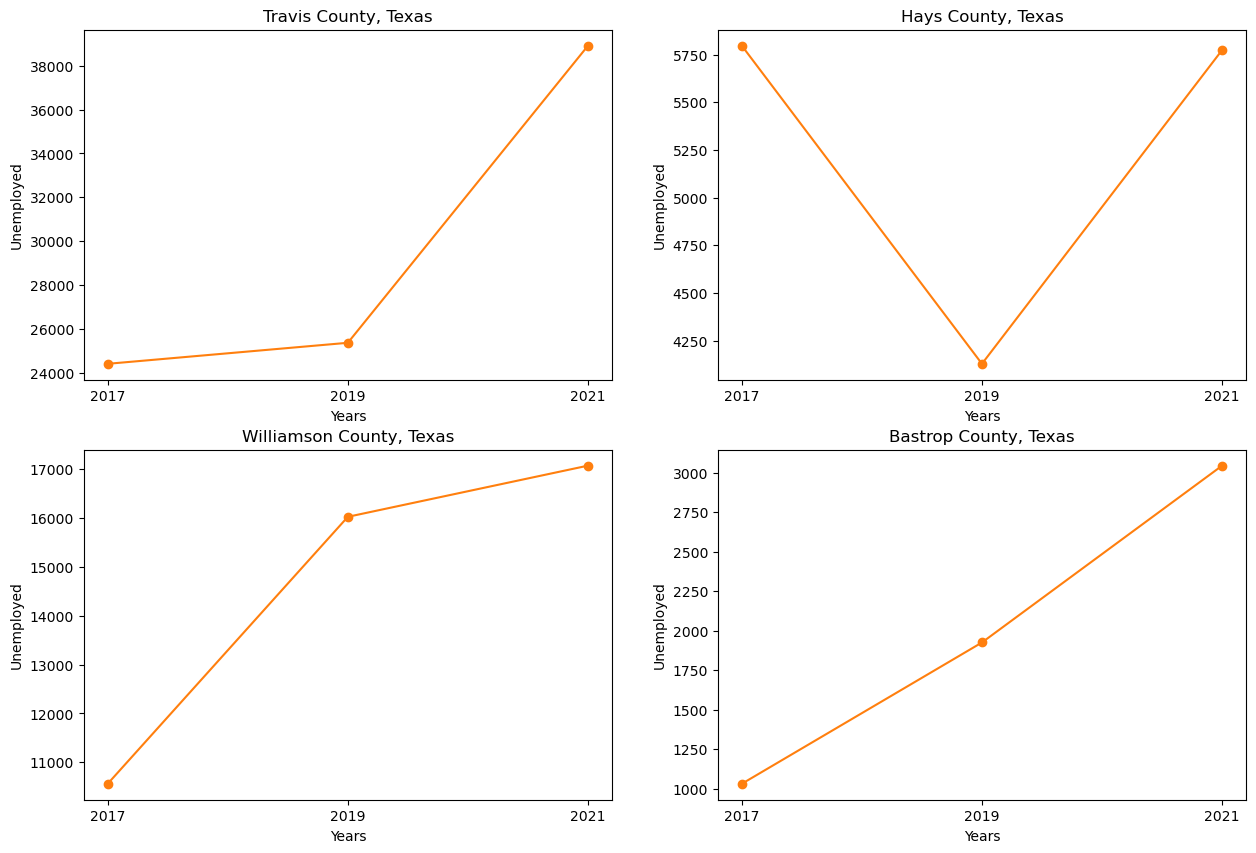

In [13]:
# Create 1 figure containing a linegraphs for each county vs years
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Set the x values equal to the years
x = ['2017', '2019', '2021']

# Set the y values equal to the Unemployed for ages>=16 for each county 
y1 = unemployed_df.loc['Travis County, Texas'].astype(int).tolist()
y2 = unemployed_df.loc['Hays County, Texas'].astype(int).tolist()
y3 = unemployed_df.loc['Williamson County, Texas'].astype(int).tolist()
y4 = unemployed_df.loc['Bastrop County, Texas'].astype(int).tolist()

# Plot a graph for each county
axs[0,0].plot(x, y1, color ='tab:orange',marker = 'o')
axs[0,1].plot(x, y2, color ='tab:orange',marker = 'o')
axs[1,0].plot(x, y3,  color ='tab:orange',marker = 'o')
axs[1,1].plot(x, y4,  color ='tab:orange',marker = 'o')

# Set the labels and titles for each graph
axs[0,0].set_title('Travis County, Texas')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Unemployed')


axs[0,1].set_title('Hays County, Texas')
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('Unemployed')


axs[1,0].set_title('Williamson County, Texas')
axs[1,0].set_xlabel('Years')
axs[1,0].set_ylabel('Unemployed')


axs[1,1].set_title('Bastrop County, Texas')
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('Unemployed')

plt.savefig("output_data/Fig3_unemployment.png")
plt.show() 

In [14]:
# County Unemployment chi square test with stats.chisquare()
counties = ['Travis','Hays','Williamson','Bastrop']

# With four rows, the degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
crictical = critical_value
print(f"The critical value is:  {crictical}")


# Run the chi square test with stats.chisquare() for all 4 counties
dif_Travis_df = pd.DataFrame(unemployed_df.loc['Travis County, Texas'].astype(float))
expected_Travis= dif_Travis_df['Travis County, Texas'].mean()
dif_Travis_df = dif_Travis_df.assign(Expected=expected_Travis).astype(float)
Travis_st, Travis_p = stats.chisquare(dif_Travis_df['Travis County, Texas'], dif_Travis_df['Expected'])

dif_Hays_df = pd.DataFrame(unemployed_df.loc['Hays County, Texas'].astype(float))
expected_Hays= dif_Hays_df['Hays County, Texas'].mean()
dif_Hays_df = dif_Hays_df.assign(Expected=expected_Hays).astype(float)
Hays_st, Hays_p = stats.chisquare(dif_Hays_df['Hays County, Texas'], dif_Hays_df['Expected'])

dif_Williamson_df = pd.DataFrame(unemployed_df.loc['Williamson County, Texas'].astype(float))
expected_Williamson= dif_Williamson_df['Williamson County, Texas'].mean()
dif_Williamson_df = dif_Williamson_df.assign(Expected=expected_Williamson).astype(float)
Williamson_st, Williamson_p = stats.chisquare(dif_Williamson_df['Williamson County, Texas'], dif_Williamson_df['Expected'])

dif_Bastrop_df = pd.DataFrame(unemployed_df.loc['Bastrop County, Texas'].astype(float))
expected_Bastrop= dif_Bastrop_df['Bastrop County, Texas'].mean()
dif_Bastrop_df = dif_Bastrop_df.assign(Expected=expected_Bastrop).astype(float)
Bastrop_st, Bastrop_p = stats.chisquare(dif_Bastrop_df['Bastrop County, Texas'], dif_Bastrop_df['Expected'])


#Create a dataframe to display our results
Statistics_Results = [[Travis_st,Travis_p],
                      [ Hays_st, Hays_p],
                      [Williamson_st, Williamson_p],
                      [Bastrop_st, Bastrop_p]]

Statistiscs_Results_df = pd.DataFrame(Statistics_Results, columns = ['Unemployment chi2 statistic','Unemployment p-value'],  index = counties )
Statistiscs_Results_df         


The critical value is:  5.991464547107979


,Unemployment chi2 statistic,Unemployment p-value
Travis,4446.132532,0.000000e+00
Hays,349.603694,1.214849e-76
Williamson,1679.509758,0.000000e+00
Bastrop,1019.275000,4.647784e-222


# Statistical Analysis
The f statistic value is high and the p-values are less than 0.05 so we have to reject the null hypothisis.

In [15]:
# Create Race  Dataframe 
race_df  = census_combined_df[['Race: White 2017','Race: White 2019','Race: White 2021',
                    'Race: Black or African American 2017','Race: Black or African American 2019','Race: Black or African American 2021',
                    'Race: Hispanic/Latino 2017', 'Race: Hispanic/Latino 2019', 'Race: Hispanic/Latino 2021',
                    'Race: Native American 2017','Race: Native American 2019','Race: Native American 2021',
                    'Race: Asian 2017','Race: Asian 2019','Race: Asian 2021',
                    'Race: Other 2017','Race: Other 2019','Race: Other 2021',
                    'Race: Two or more races 2017','Race: Two or more races 2019','Race: Two or more races 2021'
                   ]].copy().T

race_df = race_df.rename(index={'Race: White 2017': 'White (2017)',
                                  'Race: White 2019': 'White (2019)',
                                  'Race: White 2021': 'White (2021)',
                                  'Race: Black or African American 2017': 'Afri-Am (2017)',
                                  'Race: Black or African American 2019': 'Afri-Am (2019)',
                                  'Race: Black or African American 2021': 'Afri-Am (2021)',
                                  'Race: Hispanic/Latino 2017': 'Hispanic/Latino (2017)', 
                                  'Race: Hispanic/Latino 2019': 'Hispanic/Latino (2019)', 
                                  'Race: Hispanic/Latino 2021': 'Hispanic/Latino (2021)',
                                  'Race: Native American 2017': 'Native-Am (2017)',
                                  'Race: Native American 2019': 'Native-Am (2019)',
                                  'Race: Native American 2021': 'Native-Am (2021)',
                                  'Race: Asian 2017': 'Asian 2017 (2017)',
                                  'Race: Asian 2019': 'Asian 2017 (2019)',
                                  'Race: Asian 2021': 'Asian 2017 (2021)',
                                  'Race: Other 2017': 'Other (2017)',
                                  'Race: Other 2019': 'Other (2019)',
                                  'Race: Other 2021': 'Other (2021)',
                                  'Race: Two or more races 2017': 'Two or more (2017)',
                                  'Race: Two or more races 2019': 'Two or more (2019)',
                                  'Race: Two or more races 2021': 'Two or more (2021)',
                                 })
race_df.fillna(0, inplace=True)
race_df

Name,"Travis County, Texas","Hays County, Texas","Williamson County, Texas","Bastrop County, Texas"
White (2017),866322,187859,435271,60565
White (2019),920247,204010,469151,57372
White (2021),717362,149132,387893,58879
Afri-Am (2017),101281,9325,32555,7170
Afri-Am (2019),104062,9776,40399,5334
Afri-Am (2021),102957,8401,42188,4262
Hispanic/Latino (2017),416156,83712,134251,32074
Hispanic/Latino (2019),428571,92274,146602,35189
Hispanic/Latino (2021),435437,103795,163099,43199
Native-Am (2017),7940,1137,1333,295


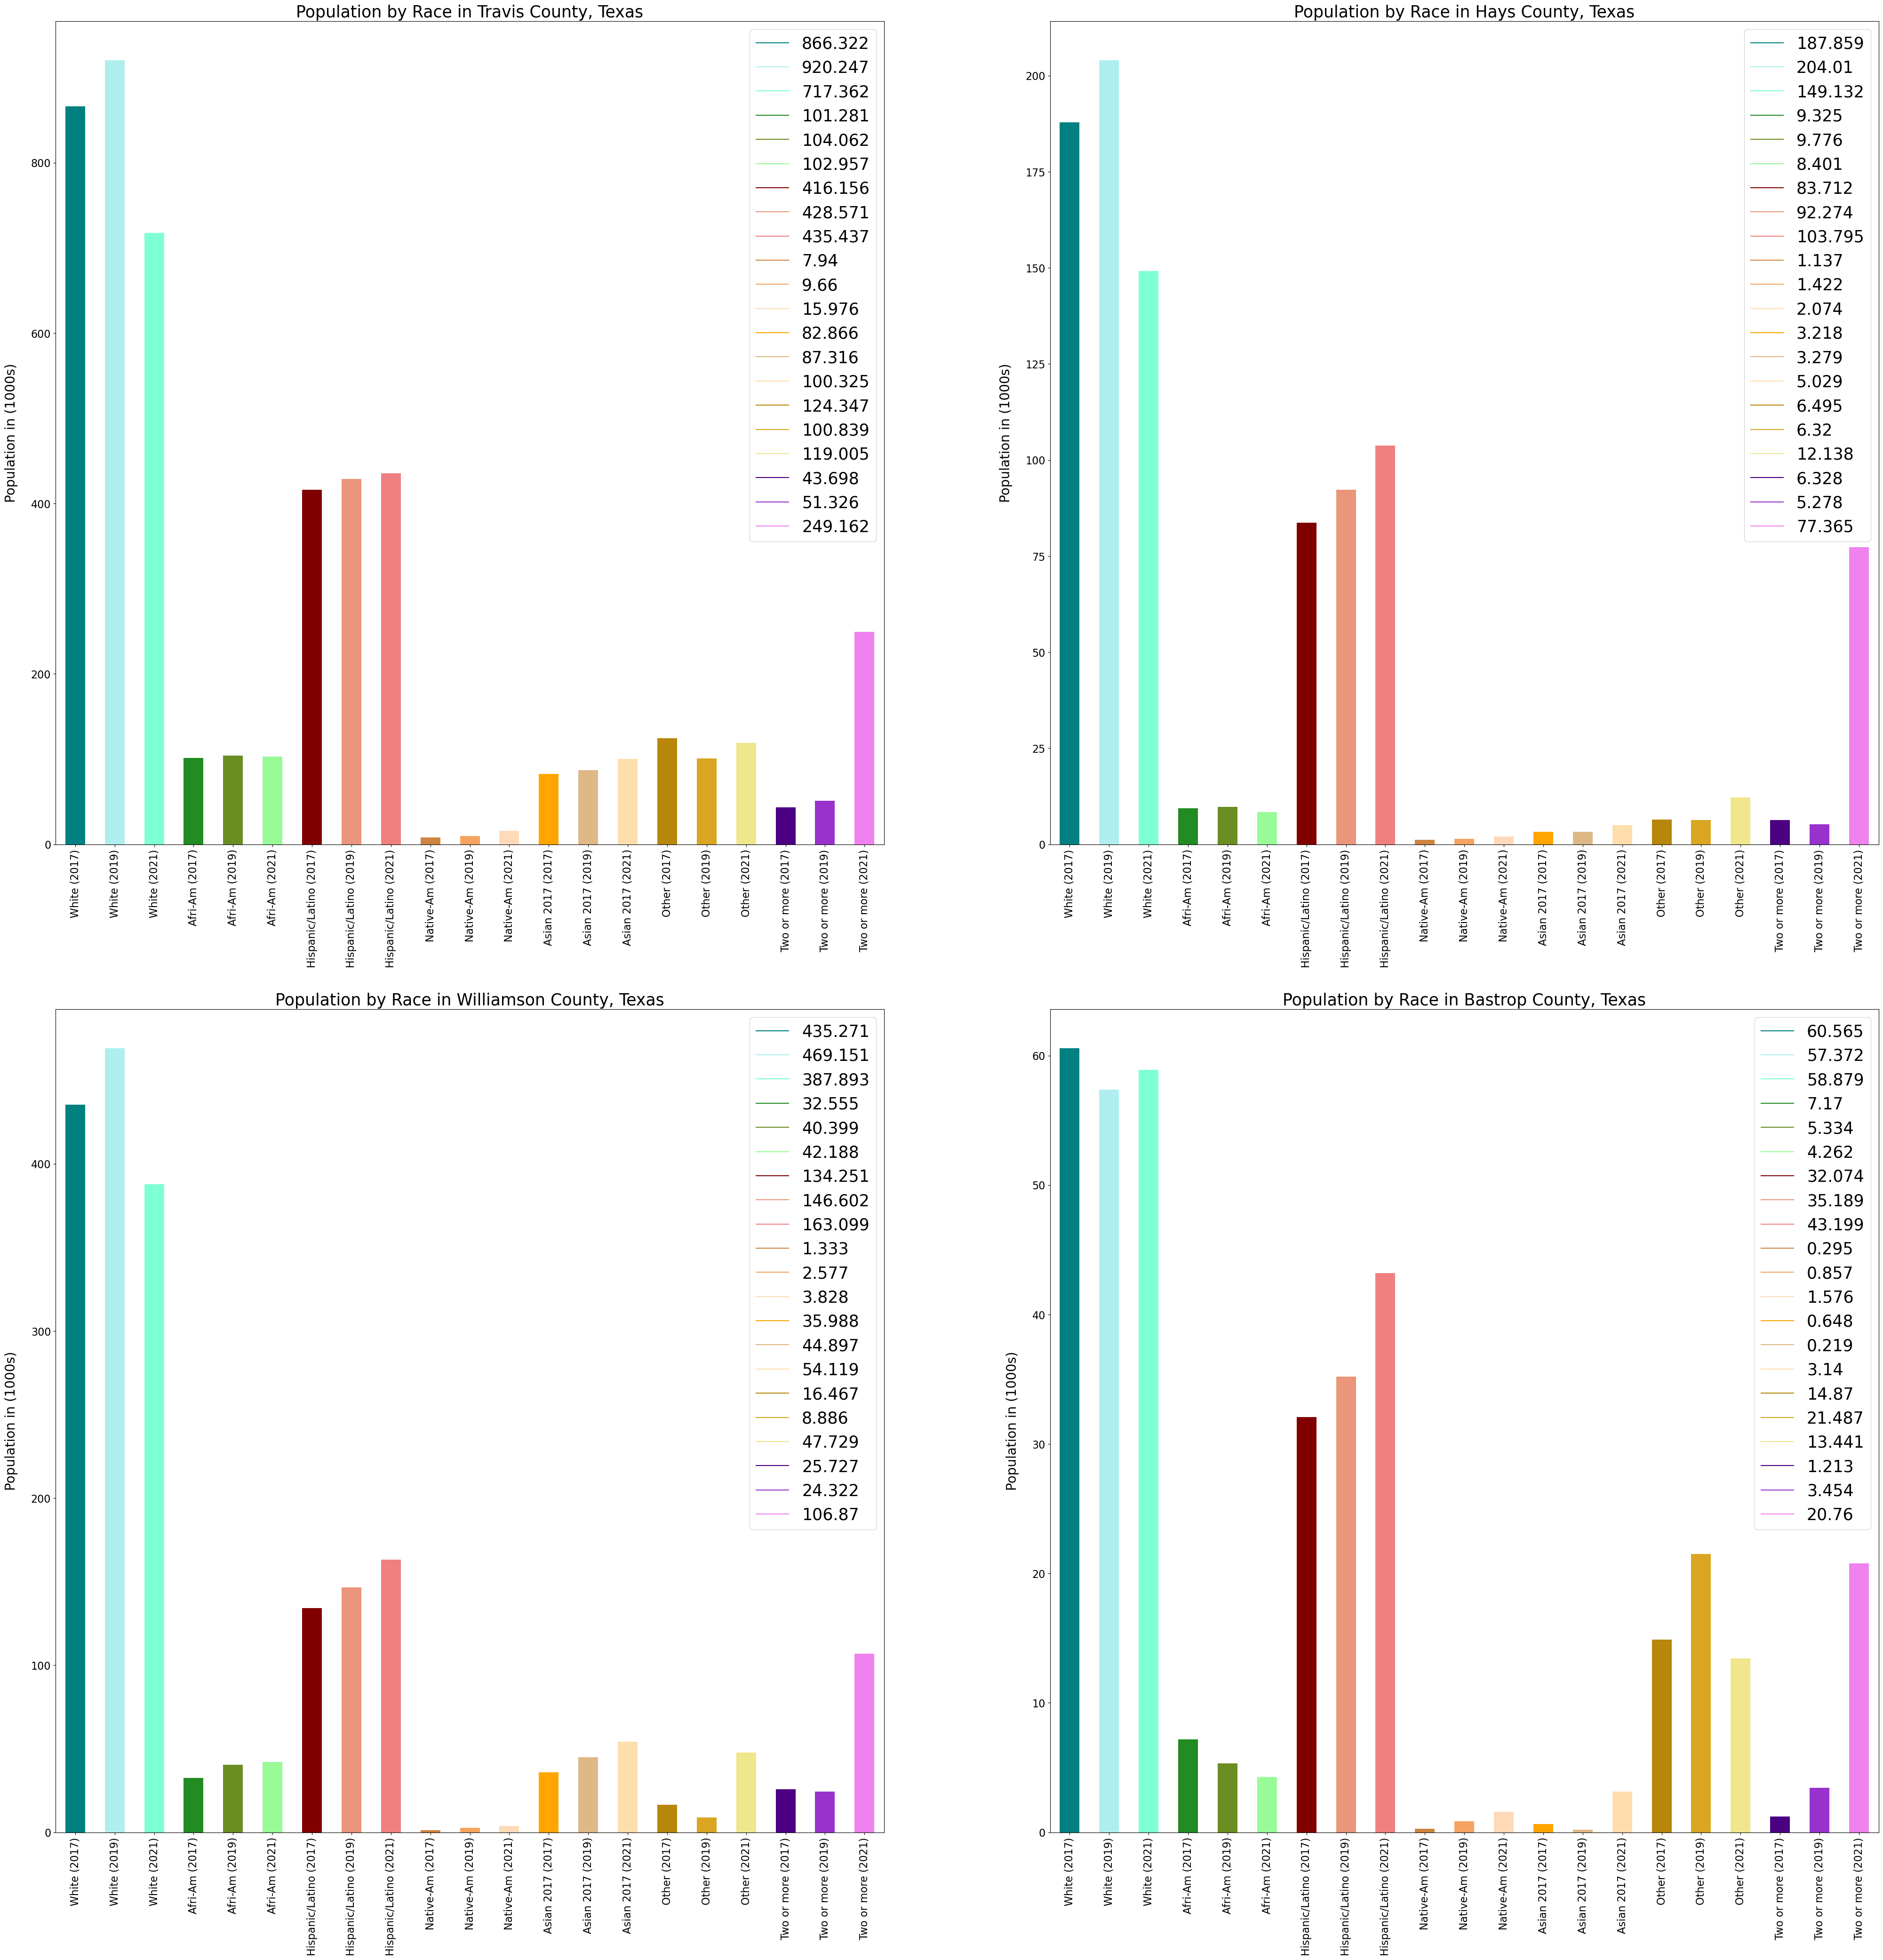

In [16]:
# store the population per county
travis_c = race_df['Travis County, Texas'].astype(int)
hayes_c = race_df['Hays County, Texas'].astype(int)
will_c = race_df['Williamson County, Texas'].astype(int)
bast_c = race_df['Bastrop County, Texas'].astype(int)

# set the colors for the bars
colors =['teal', 'paleturquoise', 'aquamarine',
         'forestgreen', 'olivedrab', 'palegreen',
         'maroon', 'darksalmon', 'lightcoral',
         'peru', 'sandybrown', 'peachpuff',
         'orange', 'burlywood', 'navajowhite',
         'darkgoldenrod', 'goldenrod', 'khaki',
         'indigo', 'darkorchid', 'violet',]

# plot
fig, axs = plt.subplots(2, 2, figsize=(50, 50))

# travis county
travis_c = travis_c / 1000
travis_c.plot.bar(ax=axs[0,0], color=colors)
axs[0,0].set_title('Population by Race in Travis County, Texas', fontsize=25)
axs[0,0].set_ylabel('Population in (1000s)', fontsize=20, labelpad=20)
axs[0,0].tick_params(axis='both', labelsize=16)
# legend
label_tc = list(travis_c)
legend_elements = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, label_tc)]
axs[0, 0].legend(handles=legend_elements, loc='upper right', fontsize=25)

# hays county
hayes_c = hayes_c / 1000
hayes_c.plot.bar(ax=axs[0,1], color=colors)
axs[0,1].set_title('Population by Race in Hays County, Texas', fontsize=25)
axs[0,1].set_ylabel('Population in (1000s)', fontsize=20, labelpad=20)
axs[0,1].tick_params(axis='both', labelsize=16)
# legend
label_h = list(hayes_c)
legend_elements = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, label_h)]
axs[0, 1].legend(handles=legend_elements, loc='upper right', fontsize=25)

# williamson county
will_c = will_c / 1000
will_c.plot.bar(ax=axs[1,0], color=colors)
axs[1,0].set_title('Population by Race in Williamson County, Texas', fontsize=25)
axs[1,0].set_ylabel('Population in (1000s)', fontsize=20, labelpad=20)
axs[1,0].tick_params(axis='both', labelsize=16)
# legend
label_will = list(will_c)
legend_elements = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, label_will)]
axs[1, 0].legend(handles=legend_elements, loc='upper right', fontsize=25)

# bastrop county
bast_c = bast_c / 1000
bast_c.plot.bar(ax=axs[1,1], color=colors)
axs[1,1].set_title('Population by Race in Bastrop County, Texas', fontsize=25)
axs[1,1].set_ylabel('Population in (1000s)', fontsize=20, labelpad=20)
axs[1,1].tick_params(axis='both', labelsize=16)
# legend
label_ba = list(bast_c)
legend_elements = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, label_ba)]
axs[1, 1].legend(handles=legend_elements, loc='upper right', fontsize=25)

plt.savefig("output_data/Fig4_Race.png")
plt.show() 